# 请自行安装 anaconda3 tensorflow keras!

## 导入模块，准备训练 MNIST 手写体数据集

In [23]:
import keras

from keras.datasets import mnist

# Sequential 模型：一层层顺序放置 layer，搭建 CNN
from keras.models import Sequential

# 2D 图像的处理，用到 2D 的卷积与池化
from keras.layers import Conv2D, MaxPooling2D

# 其他常用的 layer
from keras.layers import Dense, Dropout, Flatten, BatchNormalization

from keras import backend as K
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 参数设置

In [24]:
# 分批次训练，每次导入 128 张图片进行反向传播。增加速度，减少内存，避免过拟合
batch_size = 128

# 分 10 类
num_classes = 10

# 12 个训练周期
epochs = 12

# 图像参数
img_rows, img_cols = 28, 28

print(K.image_data_format())

channels_last


### 一些输入格式的调整...

In [61]:
### 读入数据
(x_train, y_train),  (x_test, y_test) = mnist.load_data()

print(x_train.shape)


### 按照 backend 的数据要求 reshape 格式... 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(-1, 1, img_rows, img_cols)
    x_test = x_test.reshape(-1, 1, img_rows, img_cols)
    input_shape = x_train[0].shape
else:
    x_train = x_train.reshape(-1, img_rows, img_cols, 1)
    x_test = x_test.reshape(-1, img_rows, img_cols, 1)
    input_shape = x_train[0].shape

print(x_train.shape)    

(60000, 28, 28)
(60000, 28, 28, 1)


In [62]:
### 统一弄成 float32，手动归一化一波
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


### 输出格式的调整...

In [63]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
    
y_train.shape

(60000, 10)

## 搭建CNN

In [31]:
model1 = Sequential(
    [
        BatchNormalization(input_shape=input_shape),
        Conv2D(4, kernel_size=(3,3), activation='relu',  padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(8, (3, 3), activation='relu',padding='same'), 
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(16, (3, 3), activation='relu',padding='same'), 
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2), 
        Flatten(), 
        Dense(256, activation='relu', ), 
        Dropout(0.5), 
        Dense(num_classes, activation='softmax'),        
    ]
)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 16)          0         
__________

## 选择优化器与损失函，训练
见 https://img-blog.csdn.net/20170331170531161

In [32]:
model1.compile(
            optimizer=keras.optimizers.Adadelta(), 
            loss='categorical_crossentropy', ## 一种分类常用损失函数
            metrics=['accuracy']
              )

In [33]:
model1.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1, 
          validation_data=(x_test, y_test)
          )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.5254 - acc: 0.8284 - val_loss: 0.1285 - val_acc: 0.9569
Epoch 2/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.2013 - acc: 0.9370 - val_loss: 0.0925 - val_acc: 0.9706
Epoch 3/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.1597 - acc: 0.9502 - val_loss: 0.0803 - val_acc: 0.9735
Epoch 4/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.1379 - acc: 0.9572 - val_loss: 0.0670 - val_acc: 0.9787
Epoch 5/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.1268 - acc: 0.9605 - val_loss: 0.0647 - val_acc: 0.9790
Epoch 6/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.1142 - acc: 0.9640 - val_loss: 0.0586 - val_acc: 0.9806
Epoch 7/12
60000/60000 [==============================] - 10s 159us/step

Populating the interactive namespace from numpy and matplotlib
image index:  0


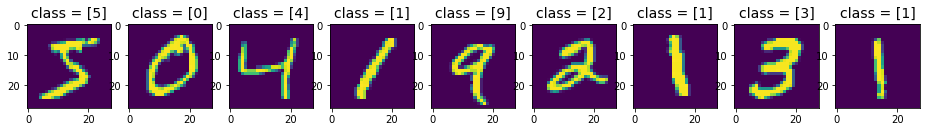

image index:  10000


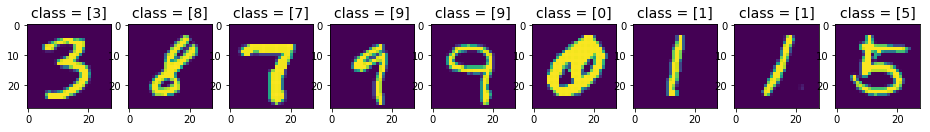

image index:  20000


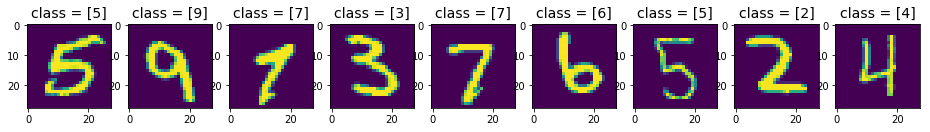

image index:  30000


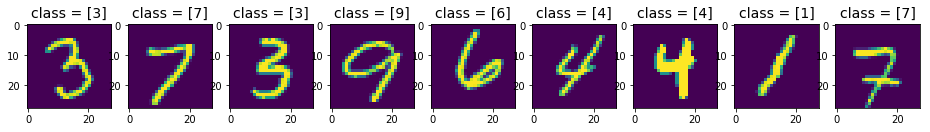

image index:  40000


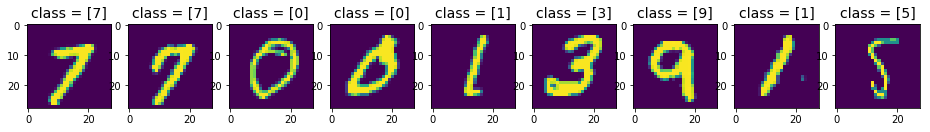

image index:  50000


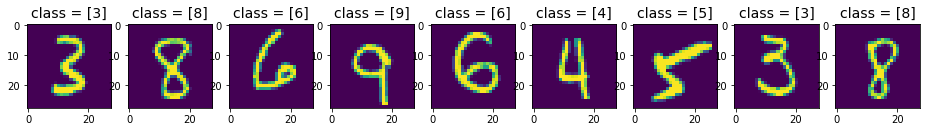

In [64]:
%pylab inline
#import keras
#from keras.datasets import mnist

#(X_train, y_train), (X_test, y_test) = mnist.load_data()

for istart  in [0, 10000, 20000, 30000, 40000, 50000]:

    print('image index: ',istart)
    fig, axs = subplots(1,9, figsize=(16,4))

    row = 0
    for ax in axs:
            ax.imshow(X_train[row+istart]); row+=1
            ax.set_title('class = '+str([x.argmax() for x in model1.predict(x_train[row-1+istart:row+istart])]),
                        fontsize=14)
    plt.show()

In [66]:
score = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 97us/step
Test loss: 0.0420898478387855
Test accuracy: 0.9866


# 示例一个具有更多 filter 的 CNN ...

In [67]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 60s 996us/step - loss: 0.2662 - acc: 0.9189 - val_loss: 0.0574 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0888 - acc: 0.9735 - val_loss: 0.0397 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0665 - acc: 0.9805 - val_loss: 0.0353 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0530 - acc: 0.9838 - val_loss: 0.0329 - val_acc: 0.9880
Epoch 5/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0307 - val_acc: 0.9882
Epoch 6/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0407 - acc: 0.9873 - val_loss: 0.0316 - val_acc: 0.9894
Epoch 7/12
60000/60000 [=============================